In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
train = pd.read_csv('E:\Coding\MachineLearning\CSVFile\VNI.csv')
test = pd.read_csv('E:\Coding\MachineLearning\CSVFile\VNItest.csv')

In [7]:
train

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2021,"1,498.28","1,485.97","1,499.07","1,485.97",875.73K,0.83%
1,12/30/2021,"1,485.97","1,490.96","1,493.38","1,484.82",747.86K,0.01%
2,12/29/2021,"1,485.82","1,494.39","1,498.91","1,485.82",843.88K,-0.57%
3,12/28/2021,"1,494.39","1,488.88","1,499.77","1,483.97",1.00M,0.37%
4,12/27/2021,"1,488.88","1,477.03","1,490.12","1,469.91",752.11K,0.80%
...,...,...,...,...,...,...,...
125,07/07/2021,"1,388.55","1,354.79","1,388.55","1,334.58",733.80K,2.49%
126,07/06/2021,"1,354.79","1,411.13","1,418.99","1,354.79",773.51K,-3.99%
127,07/05/2021,"1,411.13","1,420.27","1,421.52","1,394.12",774.45K,-0.64%
128,07/02/2021,"1,420.27","1,422.89","1,424.28","1,415.82",706.83K,0.23%


In [5]:
test.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,10/31/2022,"1,027.94","1,028.24","1,030.32","1,005.00",662.04K,0.06%
1,10/28/2022,"1,027.36","1,028.01","1,044.57","1,026.53",654.70K,-0.06%
2,10/27/2022,"1,028.01",993.36,"1,028.01",990.48,647.72K,3.49%
3,10/26/2022,993.36,997.70,"1,004.55",984.71,448.28K,-0.44%
4,10/25/2022,997.70,986.15,"1,011.39",962.45,751.18K,1.17%


In [8]:
train["Change %"] = train["Change %"].str.replace('%', '').astype(float)
train["Price"] = train["Price"].str.replace(',', '').astype(float)
train["Open"] = train["Open"].str.replace(',', '').astype(float)
train["High"] = train["High"].str.replace(',', '').astype(float)
train["Low"] = train["Low"].str.replace(',', '').astype(float)
train["Vol."] = train["Vol."].str.replace('K', '0')
train["Vol."] = train["Vol."].str.replace('M', '0000')
train["Vol."] = train["Vol."].str.replace('.', '').astype(float)

C:\Users\PC\AppData\Local\Temp\ipykernel_13912\1822012783.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train["Vol."] = train["Vol."].str.replace('.', '').astype(float)


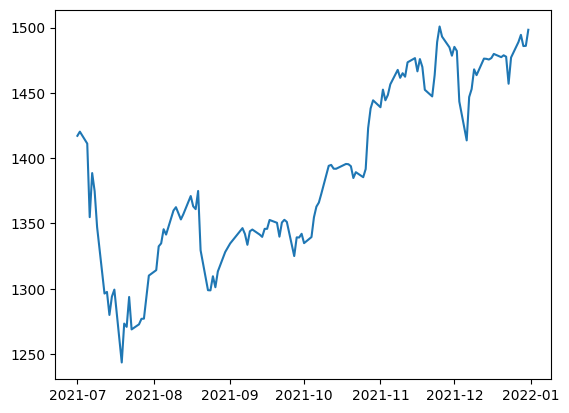

In [9]:
import matplotlib.pyplot as plt
plt.plot(pd.to_datetime(train['Date']),train['Price'])

In [14]:
x = train["Date"]

In [15]:
y = train["Price"]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Open','High','Low','Price']])
X_scaled = scaler.transform(train[['Open','High','Low','Price']])

In [22]:
X_scaled.shape

(130, 4)

In [20]:
x.shape

(130,)

In [24]:
X=[]
y=[]
for i in range(0,len(X_scaled)-60):
    row = X_scaled[i:i+60, :]
    X.append(row)
    y.append(X_scaled[i+60,0])
X = np.array(X)
X.shape

(70, 60, 4)